#파라미터 튜닝

In [ ]:
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data


tf.reset_default_graph()
tf.set_random_seed(777)
mnist = input_data.read_data_sets('/content/drive/My Drive/lecture/l_d/p6/MNIST_data/', one_hot=True)

learning_rate = 0.0005
training_epochs = 30
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
print(X)
X_img = tf.reshape(X, [-1, 28, 28, 1])
print(X_img)
Y = tf.placeholder(tf.float32, [None, 10])
print(Y)
is_training = tf.placeholder(tf.bool)

Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/train-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /content/drive/My Drive/lecture/l_d/p6/MNIST_data/t10k-labels-idx1-ubyte.gz
Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)


In [ ]:
import time


W1 = tf.Variable(tf.random_normal([5, 5, 1, 32], stddev=0.01))
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.layers.dropout(L1, 0.5, is_training)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([4, 4, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
#L2 = tf.layers.dropout(L2, 0.5)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1],
                    strides=[1, 2, 2, 1], padding='SAME')

W22 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
L22 = tf.nn.conv2d(L2, W22, strides=[1, 1, 1, 1], padding='SAME')
L22 = tf.nn.relu(L22)
L22 = tf.layers.dropout(L22, 0.5, is_training)

W222 = tf.Variable(tf.random_normal([2, 2, 128, 256], stddev=0.01))
L222 = tf.nn.conv2d(L22, W222, strides=[1, 1, 1, 1], padding='SAME')
L222 = tf.nn.relu(L222)
#L222 = tf.layers.dropout(L222, 0.5)


L2_flat = tf.reshape(L222, [-1, 7 * 7 * 256])

W3 = tf.get_variable("W3", shape=[7 * 7 * 256, 10],
                    initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b
cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y)
    )
optimizer = tf.train.RMSPropOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    start = time.time()
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, is_training: False}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
        
    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
    print('time : ', time.time() - start)
    
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print('Accuracy:', sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels
    }))

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 0001 cost = 1.021590193
time :  3.437192916870117
Accuracy: 0.9711
Epoch: 0002 cost = 0.082625339
time :  3.294584274291992
Accuracy: 0.9823
Epoch: 0003 cost = 0.051276135
time :  3.3233773708343506
Accuracy: 0.9847
Epoch: 0004 cost = 0.037412636
time :  3.328500270843506
Accuracy: 0.9875
Epoch: 0005 cost = 0.029669905
time :  3.342378616333008
Accuracy: 0.9897
Epoch: 0006 cost = 0.024199882
time :  3.3383727073669434
Accuracy: 0.9891
Epoch: 0007 cost = 0.019406545
time :  3.337028980255127
Accuracy: 0.989
Epoch: 0008 cost = 0.017089563
time :  3.7399063110351562
Accuracy: 0.9935
Epoch: 0009 cost = 0.013126212
time :  5.028562307357788
Accuracy: 0.9919
Epoch: 0010 cost = 0.010855263
time :  4.994566440582275
Accuracy: 0.9925
Epoch: 0011 cost = 0.009234938
time :  5.0115766525268555
Accuracy: 0.9913
Epoch: 0012 cost = 0.007557946
time :  5.0156331062316895
Accuracy: 0.9912
Epoch: 0013 cost = 0.006429569
time :  5.006652116775513
Accuracy: 0.99

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
    X: mnist.test.images, Y: mnist.test.labels
    }))

r = random.randint(0, mnist.test.num_examples - 1)
print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction:", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

sess.close()

Accuracy: 0.9853
Label: [2]
Prediction: [2]


#고수준 API 사용 MNIST

In [ ]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)
# 신경망 모델 구성
X = tf.placeholder(tf.float32, [None, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])
is_training = tf.placeholder(tf.bool)
# 기본적으로 inputs, outputs size, kernel_size 만 넣어주면
# 크게 신경쓰지 않아도 일반적으로 효율적인 신경망을 만들어줍니다.
L1 = tf.layers.conv2d(X, 32, [3, 3], activation=tf.nn.relu)
L1 = tf.layers.max_pooling2d(L1, [2, 2], [2, 2])
L1 = tf.layers.dropout(L1, 0.5, is_training)
L2 = tf.layers.conv2d(L1, 64, [3, 3], activation=tf.nn.relu)
L2 = tf.layers.max_pooling2d(L2, [2, 2], [2, 2])
L2 = tf.layers.dropout(L2, 0.5, is_training)
L3 = tf.contrib.layers.flatten(L2)
L3 = tf.layers.dense(L3, 512, activation=tf.nn.relu)
L3 = tf.layers.dropout(L3, 0.5, is_training)
model = tf.layers.dense(L3, 10, activation=None)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [ ]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
batch_size = 100
total_batch = int(mnist.train.num_examples/batch_size)
for epoch in range(15):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        batch_xs = batch_xs.reshape(-1, 28, 28, 1)
        _, cost_val = sess.run([optimizer, cost],
        feed_dict={X: batch_xs,
        Y: batch_ys,
        is_training: True})
        total_cost += cost_val
    print('Epoch:', '%04d' % (epoch + 1),
    'Avg. cost =', '{:.4f}'.format(total_cost / total_batch))
print('최적화 완료!')

Epoch: 0001 Avg. cost = 0.1636
Epoch: 0002 Avg. cost = 0.0445
Epoch: 0003 Avg. cost = 0.0302
Epoch: 0004 Avg. cost = 0.0224
Epoch: 0005 Avg. cost = 0.0163
Epoch: 0006 Avg. cost = 0.0136
Epoch: 0007 Avg. cost = 0.0107
Epoch: 0008 Avg. cost = 0.0088
Epoch: 0009 Avg. cost = 0.0054
Epoch: 0010 Avg. cost = 0.0080
Epoch: 0011 Avg. cost = 0.0043
Epoch: 0012 Avg. cost = 0.0063
Epoch: 0013 Avg. cost = 0.0045
Epoch: 0014 Avg. cost = 0.0048
Epoch: 0015 Avg. cost = 0.0035
최적화 완료!


In [ ]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도:',
      sess.run(accuracy, feed_dict={X: mnist.test.images.reshape(-1, 28, 28, 1),
                                    Y: mnist.test.labels, is_training: False}))

정확도: 0.9915


#CNN with keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os, shutil


#original_dataset_dir = 'C:/Users/Affinity/Google 드라이브/lecture/l_d/p6/cats_and_dogs/img/'
original_dataset_dir = '/content/drive/My Drive/lecture/l_d/p6/cats_and_dogs/img/'
#base_dir = 'C:/Users/Affinity/Google 드라이브/lecture/l_d/p6/cats_and_dogs/small/'
base_dir = '/content/small/'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os. path.join(train_dir,  'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = [f'{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'Cat/', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'Cat/', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'Cat/', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = [f'{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'Dog/', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'{i}.jpg' for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'Dog/', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = [f'{i}.jpg' for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'Dog/', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print(os.listdir())
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_cats_dir)))
print(len(os.listdir(test_dogs_dir)))

['.ipynb_checkpoints', '7_15_cnn_1.ipynb', '7_16_cnn_2.ipynb', '7_17_cnn_3.ipynb', 'cats_and_dogs_small_3.h5', 'cats_and_dogs_small_4.h5', 'DL_with_Keras_c3.ipynb', 'homework.ipynb', 'Untitled0.ipynb', 'Untitled2.ipynb']
1000
1000
500
500
500
500


In [9]:
print(train_cats_dir)

C:/Users/Affinity/Google 드라이브/lecture/l_d/p6/cats_and_dogs/small/train\cats


In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.
W0717 00:40:32.308403 140321444345728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 00:40:32.361897 140321444345728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 00:40:32.373160 140321444345728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 00:40:32.429651 140321444345728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

W0717 00:40:38.712288 140321444345728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 00:40:38.720763 140321444345728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0717 00:40:38.728149 140321444345728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


'C:/Users/Affinity/Google 드라이브/lecture/l_d/p6/cats_and_dogs/small/train'

In [5]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [6]:
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)


# sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\PIL\TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Affinity\.conda\envs\keras\lib\site-packages\P

100/100 [==============================] - 10s 100ms/step - loss: 0.6812 - acc: 0.5680 - val_loss: 0.6877 - val_acc: 0.5310
Epoch 2/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6463 - acc: 0.6280 - val_loss: 0.6437 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 10s 102ms/step - loss: 0.5889 - acc: 0.6895 - val_loss: 0.6024 - val_acc: 0.6560
Epoch 4/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5706 - acc: 0.7085 - val_loss: 0.6609 - val_acc: 0.6530
Epoch 5/30
100/100 [==============================] - 12s 120ms/step - loss: 0.5374 - acc: 0.7260 - val_loss: 0.5878 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 12s 118ms/step - loss: 0.4905 - acc: 0.7565 - val_loss: 0.6890 - val_acc: 0.6090
Epoch 7/30
100/100 [==============================] - 12s 124ms/step - loss: 0.4869 - acc: 0.7735 - val_loss: 0.5993 - val_acc: 0.6810
Epoch 8/30
100/100 [==============================] - 13s 132ms/ste

In [12]:
from keras.models import load_model


model = load_model("/content/drive/My Drive/lecture/l_d/p6/cats_and_dogs/cats_and_dogs_small_1.h5")

W0717 00:44:01.860771 140321444345728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.



In [13]:
import matplotlib.pyplot as plt

model.save('cats_and_dogs_small_1.h5')


acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

NameError: ignored

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
#os.listdir(train_cats_dir)

(2, 150, 150, 3)


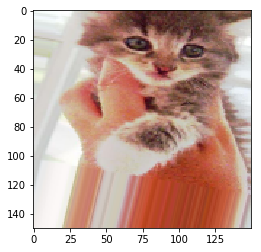

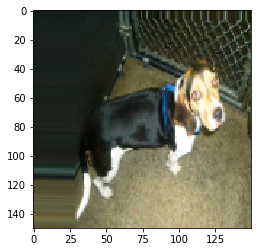

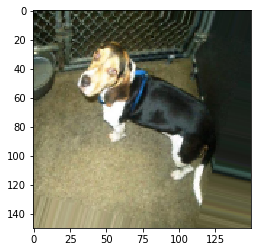

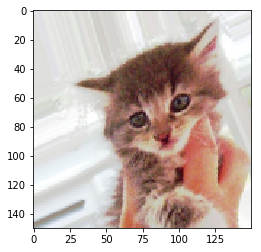

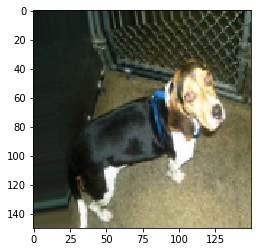

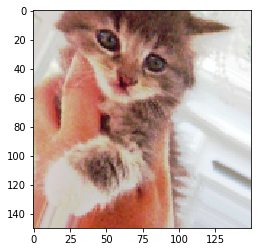

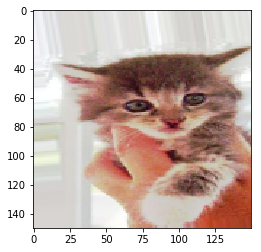

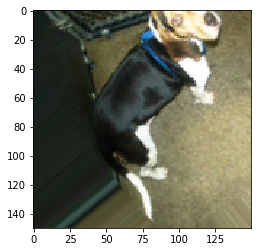

In [69]:

from keras.preprocessing import image

import numpy as np



fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
fnames2 = sorted([os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)])

# 증식할 이미지 선택합니다
img_path = fnames[3]
img_path2 = fnames2[15]

# 이미지를 읽고 크기를 변경합니다
img = image.load_img(img_path, target_size=(150, 150))
img2 = image.load_img(img_path2, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환합니다
x = image.img_to_array(img)
y = image.img_to_array(img2)

# (1, 150, 150, 3) 크기로 변환합니다
x = x.reshape((1,) + x.shape)
y = y.reshape((1,) + y.shape)
z = np.array([x, y]).reshape(2, 150, 150, 3)
print(z.shape)
# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성합니다.
# 무한 반복되기 때문에 어느 지점에서 중지해야 합니다!
i = 0
for batch in datagen.flow(z, batch_size=2):
    #plt.figure(i)
    batch.shape
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    plt.show()
    imgplot2 = plt.imshow(image.array_to_img(batch[1]))
    plt.show()
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0717 00:45:41.833787 140321444345728 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2, 
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
for a, b in train_generator:
    print(a.shape)
    print(a)
    print(b.shape)
    break

(32, 150, 150, 3)
[[[[0.9049116  0.88138217 0.89706844]
   [0.91021436 0.88668495 0.9023712 ]
   [0.9139258  0.8903964  0.9060827 ]
   ...
   [0.07170784 0.04817843 0.05602157]
   [0.08663539 0.06310597 0.07094911]
   [0.10156293 0.07803352 0.08587666]]

  [[0.9115002  0.8879708  0.9036571 ]
   [0.9114259  0.8878965  0.90358275]
   [0.9134373  0.8899079  0.90559417]
   ...
   [0.10285147 0.07932205 0.08716519]
   [0.10707202 0.08354261 0.09138574]
   [0.10856478 0.08503537 0.09287851]]

  [[0.90793246 0.88440305 0.9000893 ]
   [0.91268355 0.8891541  0.9048404 ]
   [0.91568893 0.8921595  0.9078458 ]
   ...
   [0.10869364 0.08516422 0.09300736]
   [0.12854443 0.09621846 0.1040616 ]
   [0.20168939 0.13503008 0.14287321]]

  ...

  [[1.         0.9921569  1.        ]
   [1.         0.9921569  1.        ]
   [1.         0.9921569  1.        ]
   ...
   [0.99245167 0.98460853 0.98867744]
   [0.99987465 0.9920315  0.999812  ]
   [1.         0.9921569  1.        ]]

  [[1.         0.9921569  1

In [ ]:

#model.save('cats_and_dogs_small_2.h5')
model = load_model('/content/drive/My Drive/lecture/l_d/p6/cats_and_dogs/cats_and_dogs_small_2.h5')

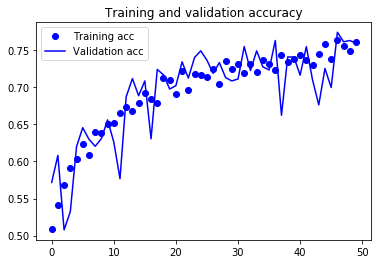

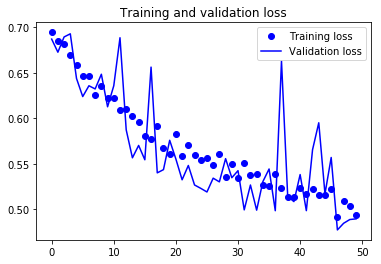

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()